In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv("EPL17-18.csv")
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [26]:
len(data)

380

In [27]:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [28]:
Teams = data.HomeTeam.unique()

In [29]:
Teams

array(['Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
       'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
       'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
       'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham'],
      dtype=object)

Create a dictionary called TeamLists. There will be an entry for each team with the list [0]

In [30]:
TeamLists = {Team: [0] for Team in Teams}
TeamLists

{'Arsenal': [0],
 'Brighton': [0],
 'Chelsea': [0],
 'Crystal Palace': [0],
 'Everton': [0],
 'Southampton': [0],
 'Watford': [0],
 'West Brom': [0],
 'Man United': [0],
 'Newcastle': [0],
 'Bournemouth': [0],
 'Burnley': [0],
 'Leicester': [0],
 'Liverpool': [0],
 'Stoke': [0],
 'Swansea': [0],
 'Huddersfield': [0],
 'Tottenham': [0],
 'Man City': [0],
 'West Ham': [0]}

In [31]:
for row in data.itertuples():
    
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    if row.FTHG > row.FTAG:
        TeamLists[Home].append(3)
        TeamLists[Away].append(0)
        
    
    elif row.FTHG < row.FTAG:
        TeamLists[Home].append(0)
        TeamLists[Away].append(3)
        
        
    else:
        TeamLists[Home].append(1)
        TeamLists[Away].append(1)

In [32]:
TeamLists['Arsenal']

[0,
 3,
 0,
 0,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 3]

In [37]:
TeamList = {Team: [0] for Team in Teams}
TeamList


for row in data.itertuples():
    
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    if row.FTHG > row.FTAG:
        TeamList[Home].append(TeamList[Home][-1]+3)
        TeamList[Away].append(TeamList[Away][-1]+0)
        
    
    elif row.FTHG < row.FTAG:
        TeamList[Home].append(TeamList[Home][-1]+0)
        TeamList[Away].append(TeamList[Away][-1]+3)
        
        
    else:
        TeamList[Home].append(TeamList[Home][-1]+1)
        TeamList[Away].append(TeamList[Away][-1]+1)

In [38]:
TeamList['Arsenal']

[0,
 3,
 3,
 3,
 6,
 7,
 10,
 13,
 13,
 16,
 19,
 19,
 22,
 25,
 28,
 28,
 29,
 30,
 33,
 34,
 37,
 38,
 39,
 39,
 42,
 42,
 45,
 45,
 45,
 45,
 48,
 51,
 54,
 54,
 57,
 57,
 60,
 60,
 63]

In [39]:
Matchday = list(range(0,39))
Matchday

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

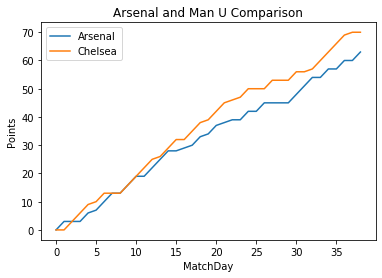

In [45]:
plt.plot(Matchday,TeamList["Arsenal"],label='Arsenal')
plt.plot(Matchday,TeamList["Chelsea"],label='Chelsea')
plt.title("Arsenal and Man U Comparison")
plt.xlabel("MatchDay")
plt.ylabel("Points")
plt.legend(loc="upper left")

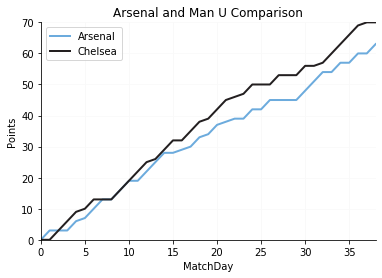

In [50]:
fig,ax = plt.subplots()

plt.plot(Matchday,TeamList["Arsenal"],label='Arsenal',color = "#6CABDD", linewidth=2)
plt.plot(Matchday,TeamList["Chelsea"],label='Chelsea',color = "#231F20", linewidth=2)
plt.title("Arsenal and Man U Comparison")
plt.xlabel("MatchDay")
plt.ylabel("Points")
plt.legend(loc="upper left")

plt.grid()
ax.xaxis.grid(color = "#F8F8F8")
ax.yaxis.grid(color = "#F9F9F9")

plt.margins(x=0,y=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

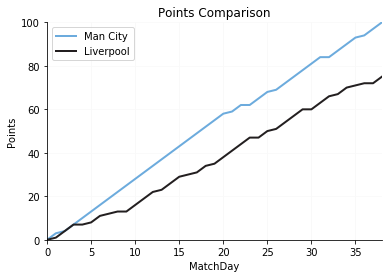

In [52]:
fig,ax = plt.subplots()

plt.plot(Matchday,TeamList["Man City"],label='Man City',color = "#6CABDD", linewidth=2)
plt.plot(Matchday,TeamList["Liverpool"],label='Liverpool',color = "#231F20", linewidth=2)
plt.title("Points Comparison")
plt.xlabel("MatchDay")
plt.ylabel("Points")
plt.legend(loc="upper left")

plt.grid()
ax.xaxis.grid(color = "#F8F8F8")
ax.yaxis.grid(color = "#F9F9F9")

plt.margins(x=0,y=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)